<a href="https://colab.research.google.com/github/Nisarga-cm-coder/Employee_Powerbi_dashboard/blob/main/Copy_of_Anudip_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STUDENT PERFORMANCE REPORT**

In [ ]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth

# Authenticate and create the gspread client
auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)

# Open the Google Sheet by URL (you can also open it by name or ID)
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/19maZxhnDplCc2qyFchhHOBPRWbUeimO9oHmXQfh6eTM/edit?usp=sharing'
spreadsheet = client.open_by_url(spreadsheet_url)

# Select the first sheet (or you can specify by sheet name)
sheet = spreadsheet.sheet1

# Get all records from the sheet (returns a list of dictionaries)
data = sheet.get_all_records()

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()  # Display the first few rows of the DataFrame


,Student Code,Name,Attendance,TD Lab Completion,TD Lab Marks %,Lab Count,Lab Assigned,FD Mcq Completion,FD Mcq Marks %,MCQ,MCQ Assigned
0,AF0415135,Charitha Kumar,43,67,54,14,21,40,33,4,10
1,AF0414656,Vaishnavi H S,5,0,0,0,21,0,0,0,10
2,AF0413899,Bhoomika M,47,86,71,18,21,100,86,10,10
3,AF0413103,Vijay Kumar D,10,0,0,0,21,0,0,0,10
4,AF0413098,Yashwanth M,58,76,60,16,21,90,79,9,10


In [ ]:


import pandas as pd

# Create a new column 'Attendance Category' based on the attendance criteria
def categorize_attendance(attendance):
    if attendance > 70:
        return 'Regular Student'
    elif 50 <= attendance <= 69:
        return 'Average Student'
    else:
        return 'Irregular Student'

df['Attendance Category'] = df['Attendance'].apply(categorize_attendance)

# Display the table with the new column
print(df[['Student Code', 'Name', 'Attendance', 'Attendance Category']])

   Student Code                 Name  Attendance Attendance Category
0     AF0415135       Charitha Kumar          43   Irregular Student
1     AF0414656        Vaishnavi H S           5   Irregular Student
2     AF0413899           Bhoomika M          47   Irregular Student
3     AF0413103        Vijay Kumar D          10   Irregular Student
4     AF0413098          Yashwanth M          58     Average Student
5     AF0413068           Varnitha S          70   Irregular Student
6     AF0412294           Amruth N P          37   Irregular Student
7     AF0412279    SHASHANK GOWDA NK          51     Average Student
8     AF0412258               Raju S          63     Average Student
9     AF0412146          MAHESH BABU           6   Irregular Student
10    AF0412060           Sindhu H S          70   Irregular Student
11    AF0412047           Anusha G S          82     Regular Student
12    AF0412036             Prisha G          10   Irregular Student
13    AF0411912           Chaithra

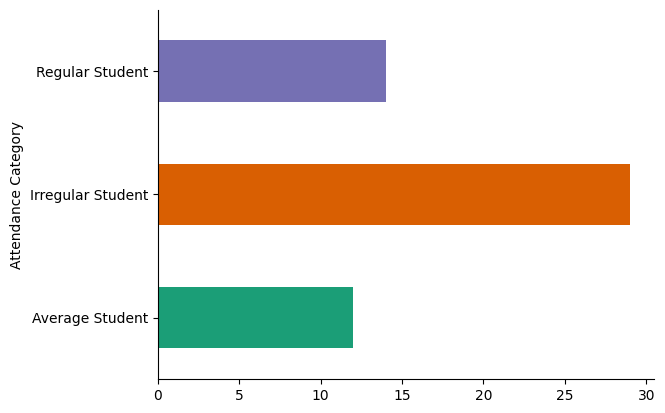

In [ ]:
# @title Attendance Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attendance Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:


# Create a new column 'Challenger_Level' based on the 'MCQ' column values.
# 8 or greater is 'Best Challenger'
# 5 to 7 is 'Average Challenger'
# Less than 5 is 'Need to Improve Challenge'
df['Challenger_Level'] = pd.cut(df['MCQ'], bins=[-1, 4, 7, 10], labels=['Need to Improve Challenge', 'Average Challenger', 'Best Challenger'], right=True)


# Display the modified dataframe with the 'Challenger_Level' column.
# The table will now include 'Student Code', 'Name', 'MCQ', and 'Challenger_Level'.
print(df[['Student Code', 'Name', 'MCQ', 'Challenger_Level']])

   Student Code                 Name  MCQ           Challenger_Level
0     AF0415135       Charitha Kumar    4  Need to Improve Challenge
1     AF0414656        Vaishnavi H S    0  Need to Improve Challenge
2     AF0413899           Bhoomika M   10            Best Challenger
3     AF0413103        Vijay Kumar D    0  Need to Improve Challenge
4     AF0413098          Yashwanth M    9            Best Challenger
5     AF0413068           Varnitha S   10            Best Challenger
6     AF0412294           Amruth N P   10            Best Challenger
7     AF0412279    SHASHANK GOWDA NK   10            Best Challenger
8     AF0412258               Raju S    7         Average Challenger
9     AF0412146          MAHESH BABU    0  Need to Improve Challenge
10    AF0412060           Sindhu H S   10            Best Challenger
11    AF0412047           Anusha G S   10            Best Challenger
12    AF0412036             Prisha G    0  Need to Improve Challenge
13    AF0411912           Chaithra

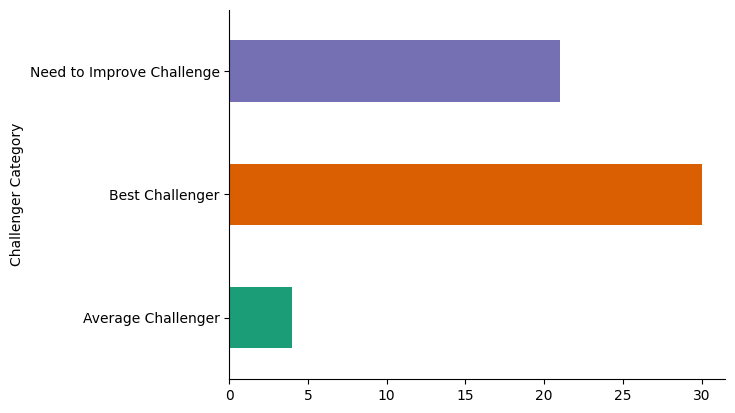

In [ ]:
# @title Challenger Category

from matplotlib import pyplot as plt
import seaborn as sns
table.groupby('Challenger Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:


import pandas as pd

# Create a new column 'Coder Category' based on 'Lab Count' values
# Best Coder: 20 or more
# Average Coder: 15 to 19
# Need to Improve Coder: Less than 15
def categorize_coder(lab_count):
    if lab_count >= 20:
        return 'Best Coder'
    elif 15 <= lab_count <= 19:
        return 'Average Coder'
    else:
        return 'Need to Improve Coder'

df['Coder Category'] = df['Lab Count'].apply(categorize_coder)

# Display the updated DataFrame
print(df[['Name','Lab Count','Coder Category']])

                   Name  Lab Count         Coder Category
0        Charitha Kumar         14  Need to Improve Coder
1         Vaishnavi H S          0  Need to Improve Coder
2            Bhoomika M         18          Average Coder
3         Vijay Kumar D          0  Need to Improve Coder
4           Yashwanth M         16          Average Coder
5            Varnitha S         21             Best Coder
6            Amruth N P         10  Need to Improve Coder
7     SHASHANK GOWDA NK         14  Need to Improve Coder
8                Raju S         12  Need to Improve Coder
9           MAHESH BABU          0  Need to Improve Coder
10           Sindhu H S         18          Average Coder
11           Anusha G S         18          Average Coder
12             Prisha G          0  Need to Improve Coder
13           Chaithra C         19          Average Coder
14            Monisha P         21             Best Coder
15            Dhanush S         17          Average Coder
16           A

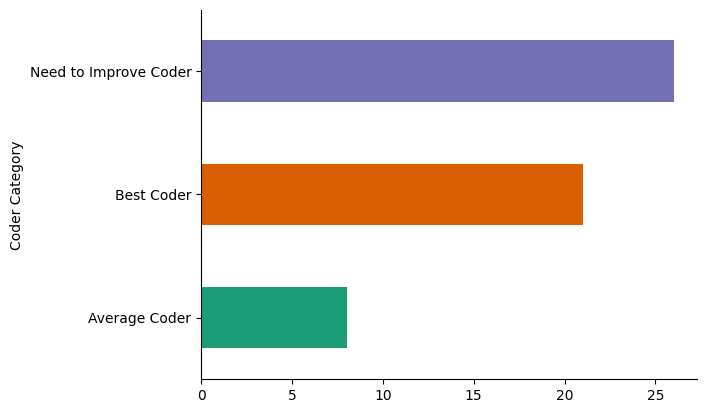

In [ ]:
# @title Coder Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Coder Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)